In [24]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np
import matplotlib
import tkinter

matplotlib.use('TkAgg')

%matplotlib inline


In [28]:
dir_name = '/home/isidro/SimpleMC/chains/'
# dir_name = '/home/isidro/SimpleMC/working_chains/'

# dir_name = '/home/isidro/SimpleMC_fail_neuralnet/chains/respaldoUAMnotebook'


roots = [
        # JLA + PLanck
        'LCDM_phy_HD+Planck_nested_dynesty_multi',
        'LCDM_phy_HD+Planck_nested_dynesty_multi_new',
        'LCDM_phy_HD+Planck_nested_dynesty_multi_new_new']
    
    #HD

#            'LCDM_phy_HD_nested_dynesty_multi',
#            'LCDM_phy_HD_nested_dynesty_multi_new', 
#            'LCDM_phy_HD_nested_dynesty_multi_new_new'

    
    
#             'owaCDM_phy_fs8_nested_dynesty_multi_new',
#             'owaCDM_phy_fs8_nested_dynesty_multi_new_new',
#             'owaCDM_phy_fs8_nested_dynesty_multi'
           
#           'LCDM_phy_fs8_nested_dynesty_multi',
#           'LCDM_phy_fs8_nested_dynesty_multi_new_new_new',

#            'LCDM_phy_HD_nested_dynesty_multi',

    
#            'LCDM_phy_HD_nested_dynesty_multi_new_new',
#            'LCDM_phy_HD_nested_dynesty_multi_new']


In [29]:
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 9,
                          ratio = 0.5, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1})

<Figure size 648x324 with 0 Axes>

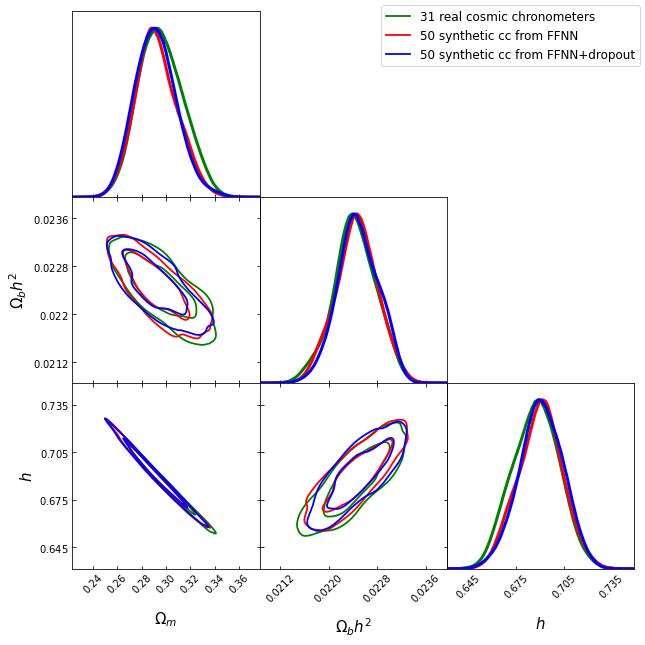

In [30]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 12
g.settings.axes_fontsize = 10      
# g.settings.lw1 = 0.5

g.triangle_plot(roots, ['Om', 'Obh2', 'h'],
                diag1d_kwargs={'colors':['green', 'red','blue','black', 'yellow']},
                colors=['green', 'red','blue',  'black', 'yellow'],
#                 alphas = [0.5, 0.5],
                legend_labels=['31 real cosmic chronometers', '50 synthetic cc from FFNN',
                               '50 synthetic cc from FFNN+dropout'],
                legend_loc='upper right',
                filled = False,
                normalized=False, shaded=False)
        
#plt.show()
# plt.savefig('TriangleFakeHz.png', dpi=300)